In [2]:
# import necessary packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown as gd

### **Data Ingestion**

In [ ]:
#download the dataset from google drive

url = 'https://docs.google.com/spreadsheets/d/14g3FeBnTxvtvfEttIId2STkTeQlhi09m/view?usp=sharing'
id = '14g3FeBnTxvtvfEttIId2STkTeQlhi09m'

gd.download(f'https://drive.google.com/uc?id={id}', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=14g3FeBnTxvtvfEttIId2STkTeQlhi09m
From (redirected): https://drive.google.com/uc?id=14g3FeBnTxvtvfEttIId2STkTeQlhi09m&confirm=t&uuid=72357f9f-e82d-45a1-b421-c226d5962d08
To: c:\Users\ncc\Desktop\task\Week_7\sales_data.xls
100%|██████████| 119M/119M [00:13<00:00, 8.83MB/s] 


'sales_data.xls'

In [11]:
#assign a variable name to the dataset

file = pd.read_csv('sales_data.xls')

### **Preliminary Data Analysis**

In [12]:
file.head(10)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
5,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,11,3206,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
6,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
7,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
8,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
9,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena


In [13]:
file.shape

(578320, 12)

In [15]:
file.columns

Index(['customer_id', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status', 'location'],
      dtype='object')

### **Data Cleaning**

In [16]:
# check for missing values
file.isna().sum()

customer_id        0
device_id          0
item_id            0
line_item_id       0
order_id           0
event_id           0
event_timestamp    0
quantity           0
currency           0
checked_out_at     0
status             0
location           0
dtype: int64

### **Exploratory Data Analysis**

In [17]:
# set the index as location

file.set_index('location', inplace=True)

In [18]:
file.head(5)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success


In [26]:
file.index.unique().sort_values()

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica (the territory South of 60 deg S)',
       'Antigua and Barbuda', 'Argentina',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='location', length=243)

In [28]:
unique_index = file.index.value_counts()
unique_index.head(20)

location
Korea                          6997
Argentina                      4507
Mauritius                      4414
Jersey                         4130
Panama                         3936
French Guiana                  3851
Guernsey                       3804
Guatemala                      3731
Albania                        3721
Philippines                    3675
Mali                           3670
Congo                          3642
Finland                        3615
Cape Verde                     3509
Christmas Island               3471
China                          3429
France                         3425
French Southern Territories    3421
Poland                         3355
Cyprus                         3345
Name: count, dtype: int64

<Axes: xlabel='location'>

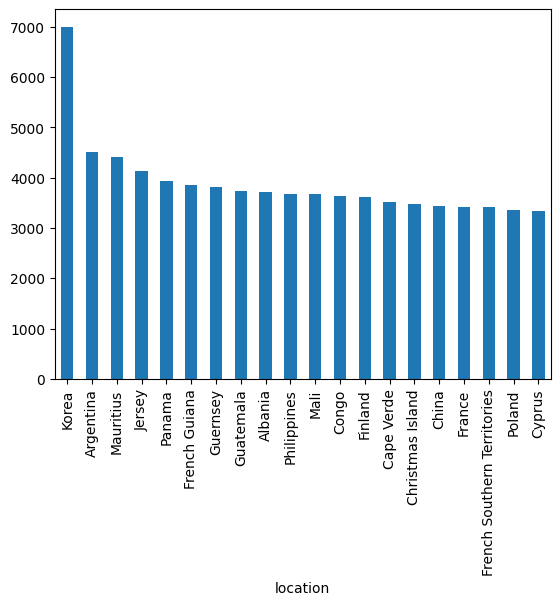

In [45]:
unique_index.head(20).plot(kind= 'bar')

<Axes: xlabel='location'>

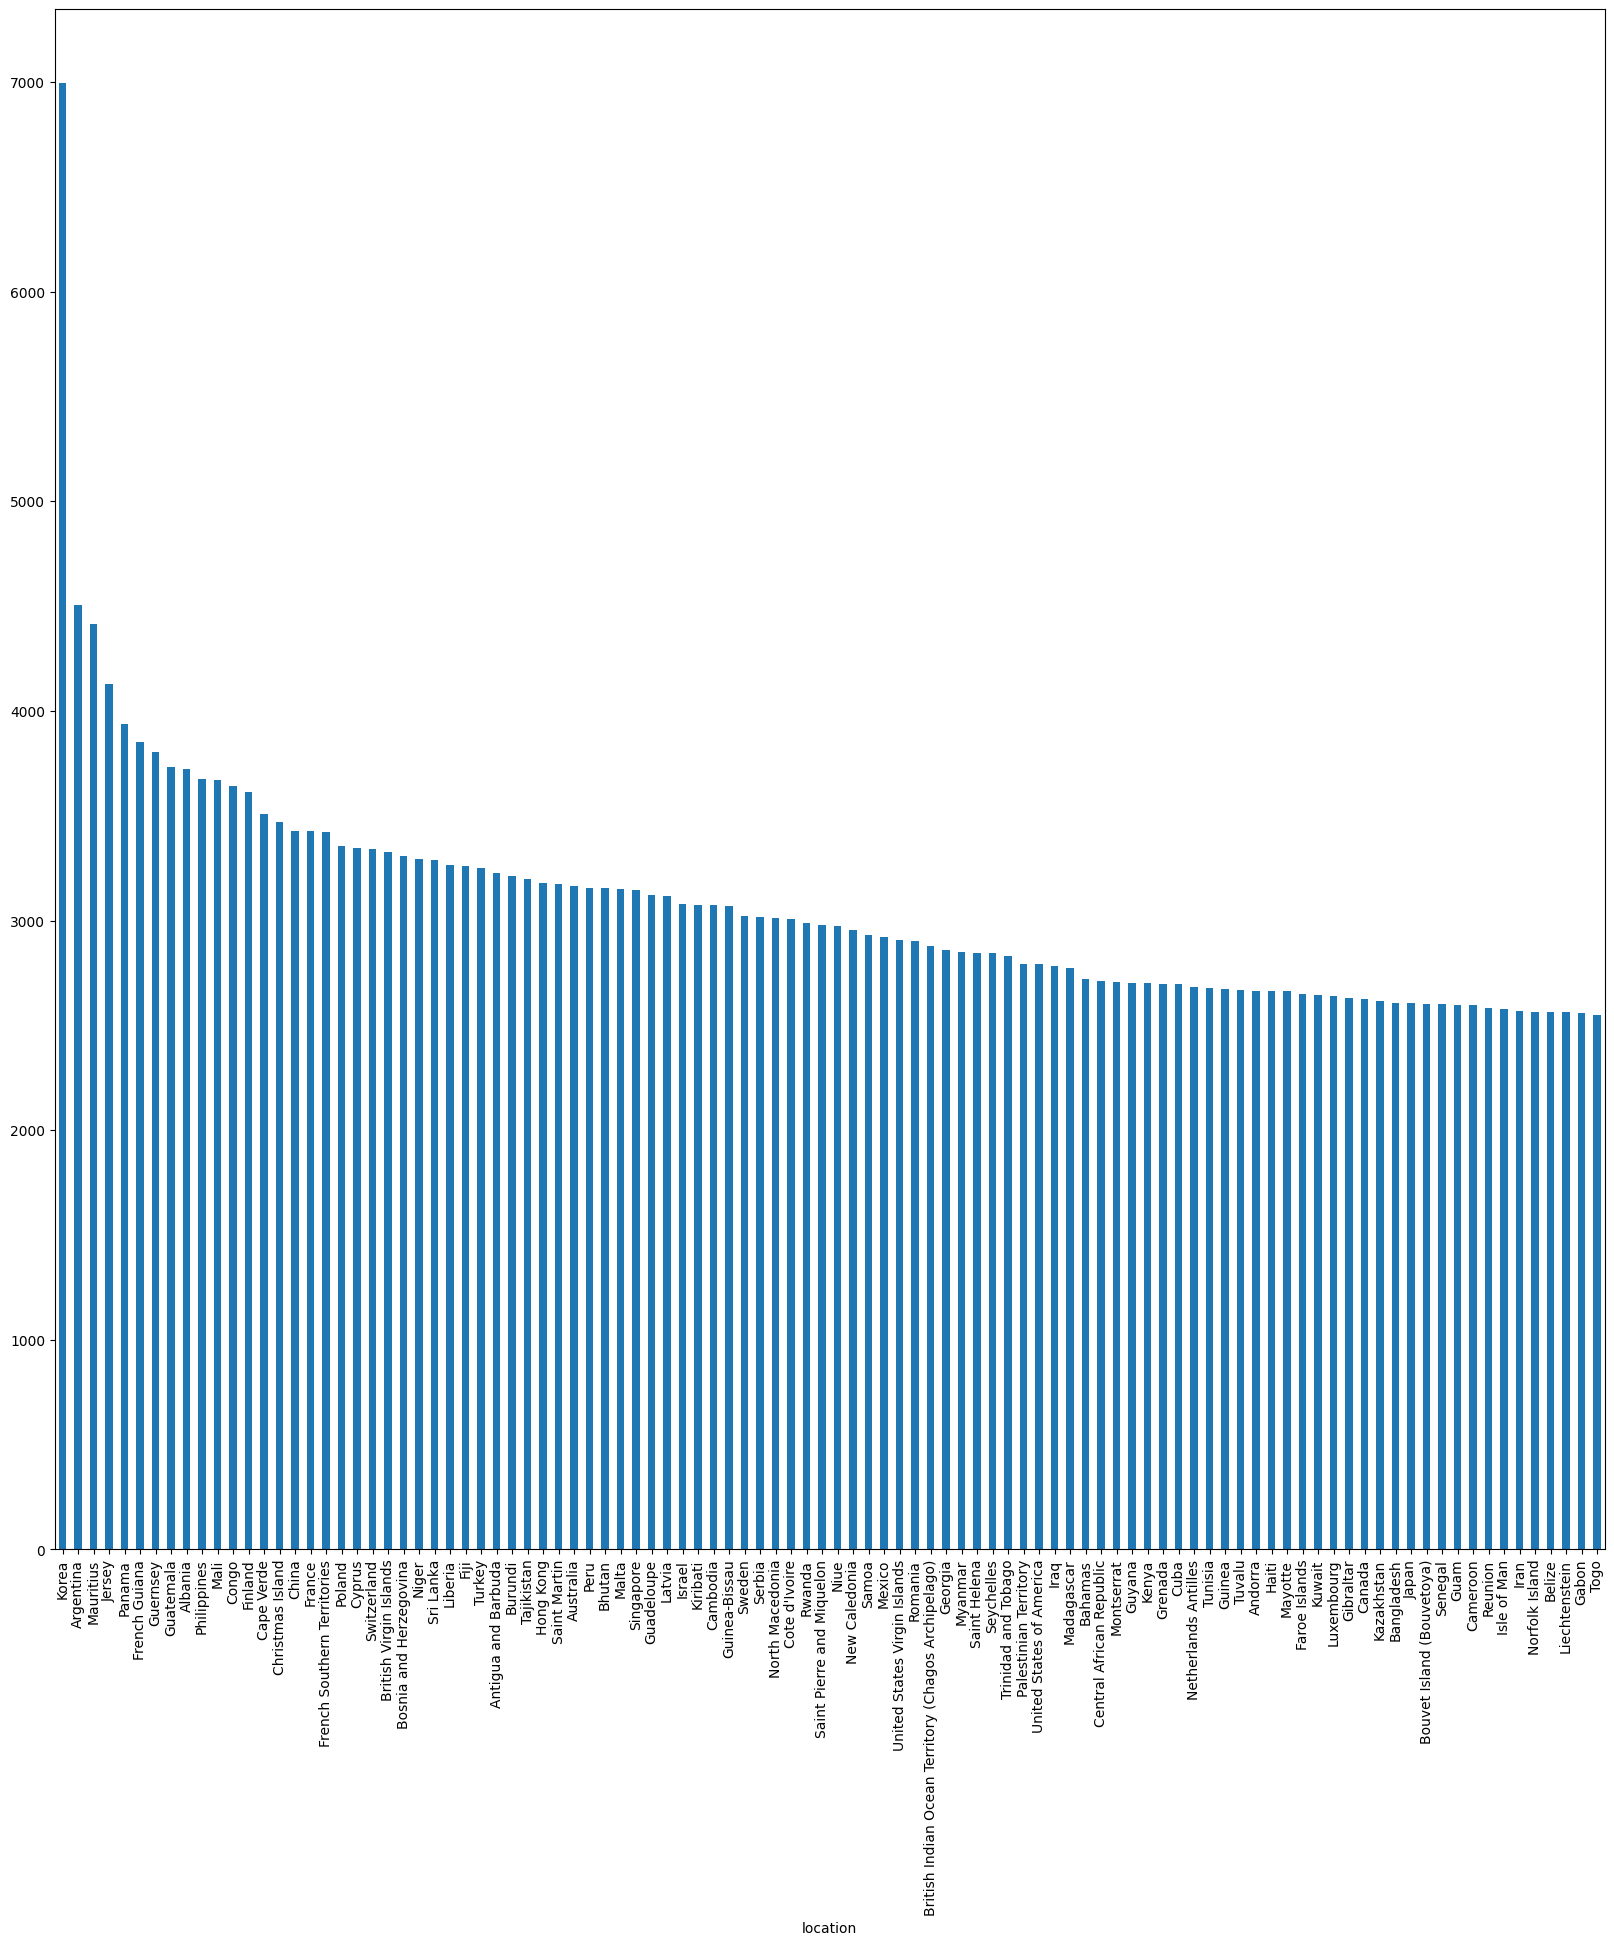

In [46]:
file.index.value_counts().head(100).plot(kind = 'bar',figsize = (20,20))

In [47]:
unique_index.nunique

<bound method IndexOpsMixin.nunique of location
Korea        6997
Argentina    4507
Mauritius    4414
Jersey       4130
Panama       3936
             ... 
Chad         1082
Malaysia     1037
Austria       921
Italy         783
Uruguay       734
Name: count, Length: 243, dtype: int64>

In [48]:
file.columns

Index(['customer_id', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status'],
      dtype='object')

In [ ]:
# Filtering/ Masking...
# Using Booleans "AND" & "OR"
# AND in pandas is written as "&"
# OR in pandas is written as "|"
#-------------------------------------------------#

In [50]:
file['customer_id'].unique

<bound method Series.unique of location
Saint Helena        cda7bec0-7cbf-4145-baf9-e049bab94504
Saint Helena        cda7bec0-7cbf-4145-baf9-e049bab94504
Saint Helena        cda7bec0-7cbf-4145-baf9-e049bab94504
Saint Helena        cda7bec0-7cbf-4145-baf9-e049bab94504
Saint Helena        cda7bec0-7cbf-4145-baf9-e049bab94504
                                    ...                 
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Name: customer_id, Length: 578320, dtype: object>

In [51]:
file[file['customer_id'] == 'ef15a7b3-326c-405f-9eef-3dbf43c85a9d']

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161951,2024-03-26 11:21:06.639379,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161951,2024-03-26 11:21:06.639379,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161952,2024-03-21 13:01:50.266228,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161952,2024-03-21 13:01:50.266228,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161953,2024-03-20 02:34:28.814874,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161953,2024-03-20 02:34:28.814874,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161954,2024-03-25 11:26:41.849567,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161954,2024-03-25 11:26:41.849567,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161955,2024-03-30 04:03:18.224148,3,USD,2024-03-30 04:14:18.224200,failed


In [ ]:
# get the total number of unique customers
file['customer_id'].nunique()

4594

<Axes: xlabel='customer_id'>

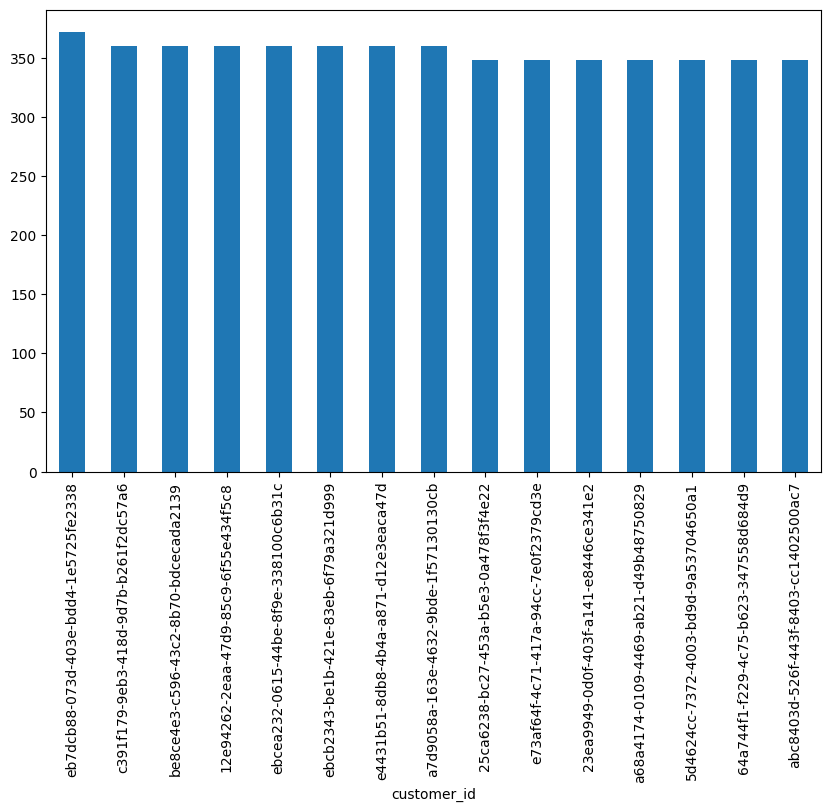

In [55]:
file['customer_id'].value_counts().sort_values(ascending=False).head(15).plot(kind = 'bar', figsize=(10, 6))

In [56]:
# pick one of the customers and see their behaviour

mask = (file['customer_id'] == 'ef15a7b3-326c-405f-9eef-3dbf43c85a9d')

In [65]:
file.loc[mask].head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161951,2024-03-26 11:21:06.639379,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161951,2024-03-26 11:21:06.639379,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161952,2024-03-21 13:01:50.266228,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161952,2024-03-21 13:01:50.266228,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161953,2024-03-20 02:34:28.814874,3,USD,2024-03-30 04:14:18.224200,failed


In [66]:
data = file.loc[mask, 'customer_id':'currency'].head
data.plot(kind= 'bar')

AttributeError: 'function' object has no attribute 'plot'